# **Case Study: Bellabeat - How can a wellness company play it smart?**
---

## Load Required Libraries

In [1]:
#To show multiple outputs and misc. changes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Show all results without print (last_expr)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import sys
import os
import platform
import time
import datetime
from pytz import timezone
import numpy as np
import pandas as pd
import logging, sys
import io
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
logging.disable(sys.maxsize)
print(f"Executable Python: {sys.executable}")
print(f"Python Version: {platform.python_version()}")

Executable Python: C:\Users\maity\.conda\envs\aku_mldl\python.exe
Python Version: 3.9.6


## Daily Data

### 1. Load Data

In [3]:
# Activity - Daily
df_daily_activity = pd.read_csv("data/dailyActivity_merged.csv", parse_dates=["ActivityDate"]) # Load data
# df_daily_activity["ActivityDate"] = pd.to_datetime(df_daily_activity["ActivityDate"], utc=False) # Change ActivityDate datatype to datetime
df_daily_activity = df_daily_activity.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# # Calories - Daily
# df_daily_calories = pd.read_csv("data/dailyCalories_merged.csv", parse_dates=["ActivityDay"]) # Load data
# df_daily_calories = df_daily_calories.rename(columns={"ActivityDay": "ActivityDate"}) # Rename specific columns
# df_daily_calories = df_daily_calories.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# # Intensities - Daily
# df_daily_intensities = pd.read_csv("data/dailyIntensities_merged.csv", parse_dates=["ActivityDay"]) # Load data
# df_daily_intensities = df_daily_intensities.rename(columns={"ActivityDay": "ActivityDate"}) # Rename specific columns
# df_daily_intensities = df_daily_intensities.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# # Steps - Daily
# df_daily_steps = pd.read_csv("data/dailySteps_merged.csv", parse_dates=["ActivityDay"]) # Load data
# df_daily_steps = df_daily_steps.rename(columns={"ActivityDay": "ActivityDate"}) # Rename specific columns
# df_daily_steps = df_daily_steps.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# HR - Seconds
# df_hr_sec = pd.read_csv("data/heartrate_seconds_merged.csv", parse_dates=[1]) # Load data from csv and change column to datetime
# df_hr_sec.to_pickle("data/df_hr_sec.pkl") # Save dataframe as pickle file
df_hr_sec = pd.read_pickle("data/df_hr_sec.pkl") # Load Data from Pickle file
df_hr_sec = df_hr_sec.rename(columns={"Time": "ActivitySecond"}) # Rename specific columns
df_hr_sec = df_hr_sec.sort_values(by=["Id", "ActivitySecond"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# MET - Minutes
# df_met_min = pd.read_csv("data/minuteMETsNarrow_merged.csv", parse_dates=[1]) # Load data from csv and change column to datetime
# df_met_min.to_pickle("data/df_met_min.pkl") # Save dataframe as pickle file
df_met_min = pd.read_pickle("data/df_met_min.pkl") # Load Data from Pickle file
df_met_min = df_met_min.rename(columns={"ActivityMinute": "ActivityMinute"}) # Rename specific columns
df_met_min = df_met_min.sort_values(by=["Id", "ActivityMinute"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# Sleep - Daily
df_daily_sleep = pd.read_csv("data/sleepDay_merged.csv", parse_dates=["SleepDay"]) # Load data
df_daily_sleep = df_daily_sleep.rename(columns={"SleepDay": "ActivityDate"}) # Rename specific columns
df_daily_sleep = df_daily_sleep.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

# Weight Daily
df_daily_weight = pd.read_csv("data/weightLogInfo_merged.csv") # Load data
df_daily_weight = df_daily_weight.rename(columns={"Date": "ActivityDate"}) # Rename specific columns
df_daily_weight["ActivityDate"] = pd.to_datetime(df_daily_weight["ActivityDate"], utc=False).dt.date # Change ActivityDate datatype to datetime
df_daily_weight["ActivityDate"] = pd.to_datetime(df_daily_weight["ActivityDate"], utc=False)
df_daily_weight = df_daily_weight.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True) # Sort data and reset index

### 2. Convert HR and MET to daily level

In [4]:
df_daily_hr = df_hr_sec.set_index(["ActivitySecond"])
df_daily_hr = df_daily_hr.groupby("Id").resample("D").mean()
del df_daily_hr["Id"]
df_daily_hr = df_daily_hr.reset_index()
df_daily_hr = df_daily_hr.rename(columns={"ActivitySecond": "ActivityDate", "Value": "AvgHR"}).sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True)

df_daily_met = df_met_min.set_index(["ActivityMinute"])
df_daily_met = df_daily_met.groupby("Id").resample("D").mean()
del df_daily_met["Id"]
df_daily_met = df_daily_met.reset_index()
df_daily_met = df_daily_met.rename(columns={"ActivityMinute": "ActivityDate", "METs": "AvgMETs"}).sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True)


### 3. Merge all daily datasets

In [5]:
df_daily_merged = df_daily_activity.merge(right = df_daily_hr, on = ["Id", "ActivityDate"], how = "left")
df_daily_merged = df_daily_merged.merge(right = df_daily_met, on = ["Id", "ActivityDate"], how = "left")
df_daily_merged = df_daily_merged.merge(right = df_daily_sleep, on = ["Id", "ActivityDate"], how = "left")
df_daily_merged = df_daily_merged.merge(right = df_daily_weight, on = ["Id", "ActivityDate"], how = "left")
df_daily_merged = df_daily_merged.sort_values(by=["Id", "ActivityDate"], ascending=[True, True]).reset_index(drop=True)
df_daily_merged.to_csv("data/df_daily_merged.csv")
df_daily_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,AvgMETs,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,17.528472,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,15.874306,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,15.686806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,15.409722,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,16.454167,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Daily Data Analysis

#### Q1 - What is my sample size?
#### Q2 - How many days of data do we have?

In [6]:
unique_id = df_daily_merged["Id"].nunique()
print(f"Total Number of Users in the dataset: {unique_id}")
print("*" * 100)

unique_days = df_daily_merged["ActivityDate"].nunique()
print(f"Total Number of Days in the dataset: {unique_days}")


Total Number of Users in the dataset: 33
****************************************************************************************************
Total Number of Days in the dataset: 31


#### Q3 - What is the daily user activity profile?
- To help us understand how active are the users (or what is the app usage levels on a daily basis)
    - We bin the total steps in 4 buckets - Sedentary/Light/Fairly Active/Very Active (4 buckets based on 25th percentile, median, 75th percentile)
    - Then we look at daily percent of users in each bucket

In [7]:
# Data Prep
df_q3 = df_daily_merged[["ActivityDate", "Id", "TotalSteps"]]
perc_25 = df_q3["TotalSteps"].quantile(0.25)
perc_median = df_q3["TotalSteps"].median()
perc_75 = df_q3["TotalSteps"].quantile(0.75)

def func_bin_steps(TotalSteps):
    if TotalSteps <= perc_25:
        return "Sedentary Active"
    elif TotalSteps > perc_25 and TotalSteps <= perc_median:
        return "Light Active"
    elif TotalSteps > perc_median and TotalSteps <= perc_75:
        return "Fairly Active"
    else:
        return "Very Active"
df_q3["TotalSteps_bin"] = list(map(func_bin_steps, df_q3["TotalSteps"]))
df_q3 = df_q3.groupby(["ActivityDate", "TotalSteps_bin"]).agg({'Id': "nunique"}).sort_values(by=["ActivityDate", "TotalSteps_bin"], ascending=[True, True]).reset_index().rename(columns={"Id": "NumberOfUsers"})
df_temp = df_q3.groupby(["ActivityDate"]).agg({'NumberOfUsers': "sum"}).sort_values(by=["ActivityDate"], ascending=[True]).reset_index().rename(columns={"NumberOfUsers": "TotalNumberOfUsers"})
df_q3 = df_q3.merge(df_temp, on = "ActivityDate", how = "inner")
df_q3["PercentOfUsers"] = df_q3["NumberOfUsers"]/df_q3["TotalNumberOfUsers"]
df_q3.head()

,ActivityDate,TotalSteps_bin,NumberOfUsers,TotalNumberOfUsers,PercentOfUsers
0,2016-04-12,Fairly Active,13,33,0.393939
1,2016-04-12,Light Active,8,33,0.242424
2,2016-04-12,Sedentary Active,5,33,0.151515
3,2016-04-12,Very Active,7,33,0.212121
4,2016-04-13,Fairly Active,7,33,0.212121


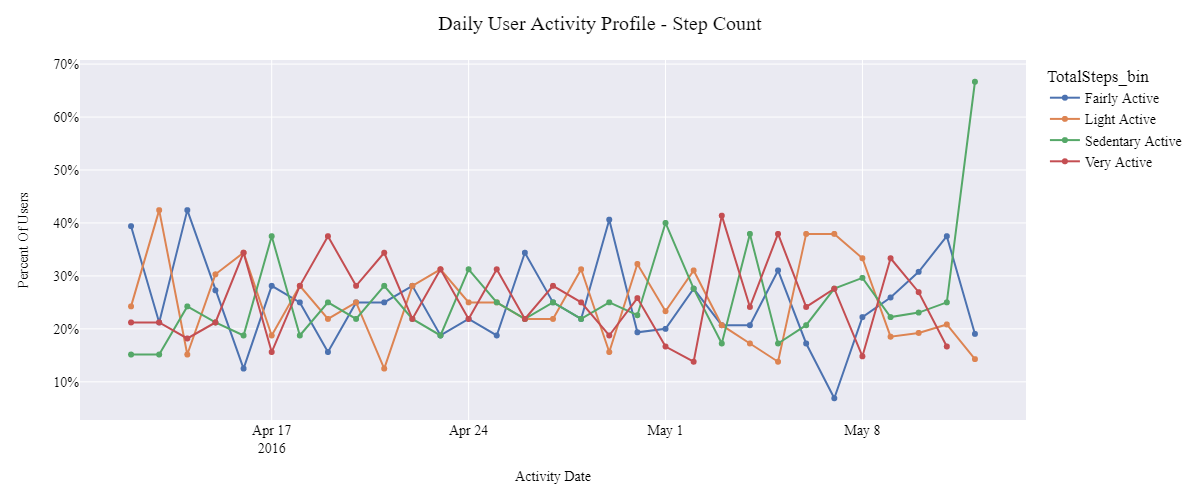

In [8]:
# Line plot
plotly_template = "seaborn"
title_text, x_axis_text, y_axis_text = "Daily User Activity Profile - Step Count", "Activity Date", "Percent Of Users"
width_text, height_text = 1200, 500
font_text, font_size_text, font_color_text = "Times New Roman", 14, "black"

fig = px.line(df_q3, x="ActivityDate", y="PercentOfUsers", color = "TotalSteps_bin", markers=True, width=width_text, height=height_text, template=plotly_template)
fig.update_layout(title=title_text, xaxis_title=x_axis_text, yaxis_title=y_axis_text, font=dict(family=font_text, size=font_size_text, color=font_color_text), legend_orientation="v")
fig.update_xaxes(title_font=dict(size=font_size_text, family=font_text, color=font_color_text))
fig.update_yaxes(title_font=dict(size=font_size_text, family=font_text, color=font_color_text))
fig.layout.yaxis.tickformat = ',.0%' 
fig.show("png");

#### Q4 - What is the overall user activity profile?
- To help us understand how active are the users (or what is the app usage levels on a daily basis)
    - We bin the total steps in 4 buckets - Sedentary/Light/Fairly Active/Very Active (4 buckets based on 25th percentile, median, 75th percentile)
    - Then we look at daily percent of users in each bucket
    - Finally we look at the average percent of users across all days

In [9]:
df_q4 = df_q3.groupby("TotalSteps_bin").agg({"PercentOfUsers": "mean"}).sort_values(by=["TotalSteps_bin"], ascending=[True]).reset_index().rename(columns={"PercentOfUsers": "Avg_PercentOfUsers"})
df_q4.head()

,TotalSteps_bin,Avg_PercentOfUsers
0,Fairly Active,0.248350
1,Light Active,0.249406
2,Sedentary Active,0.256076
3,Very Active,0.254373


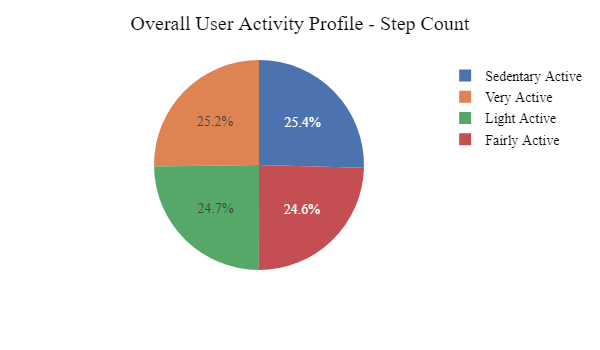

In [10]:
# Pie Chart
plotly_template = "seaborn"
title_text = "Overall User Activity Profile - Step Count"
width_text, height_text = 600, 350
font_text, font_size_text, font_color_text = "Times New Roman", 14, "black"

fig = px.pie(df_q4, values='Avg_PercentOfUsers', names='TotalSteps_bin', width=width_text, height=height_text, template=plotly_template)
fig.update_layout(title=title_text, font=dict(family=font_text, size=font_size_text, color=font_color_text))
fig.show("png");